In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('census.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
print('the number of rows and columns are :',df.shape)

the number of rows and columns are : (32560, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# there is some object type data present

# Analysis: 

In [5]:
#to check nan values in the datset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
#to check dtypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# checking the value counts of all object type data

In [8]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [9]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [10]:
df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [11]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [13]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [14]:
df.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [15]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [16]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# from the above analysis object type data we found special character '?' in Native country, occupation and Working class

# we will replace the special character with the most frequent value

In [17]:
# Replacing special character to NaN
df['Native_country'] = df['Native_country'].replace(' ?',np.nan)
df['Workclass'] = df['Workclass'].replace(' ?',np.nan)
df['Occupation'] = df['Occupation'].replace(' ?',np.nan)

In [18]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

we will replace the nan values with the most frequent value

In [19]:
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode().iloc[0])

In [20]:
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode().iloc[0])

In [21]:
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode().iloc[0])

In [22]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# we have replaced the special charachters with most frequent values of that particular column

# EDA AND VISUALIZATION

<AxesSubplot:xlabel='Income', ylabel='count'>

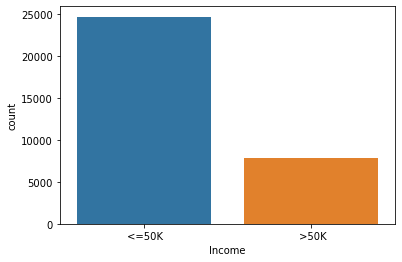

In [23]:
sns.countplot(df['Income'])

# this data is unbalaced

<AxesSubplot:xlabel='Workclass', ylabel='count'>

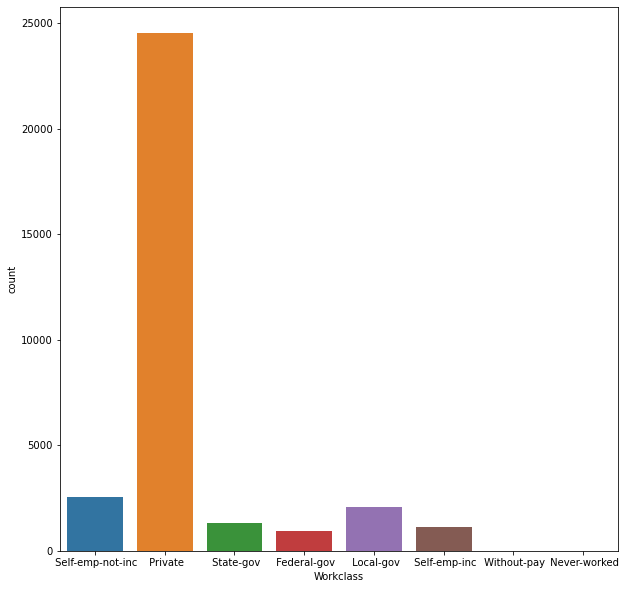

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'])

private is having the highest number of workclass

<AxesSubplot:xlabel='Sex', ylabel='count'>

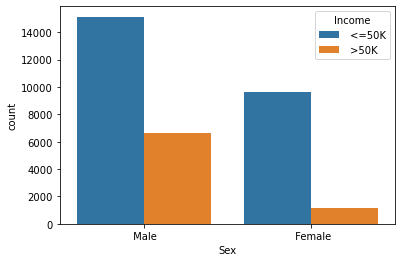

In [25]:
sns.countplot(x="Sex",hue="Income",data=df)

the income is more of male sex as compared to female

<AxesSubplot:xlabel='Occupation', ylabel='count'>

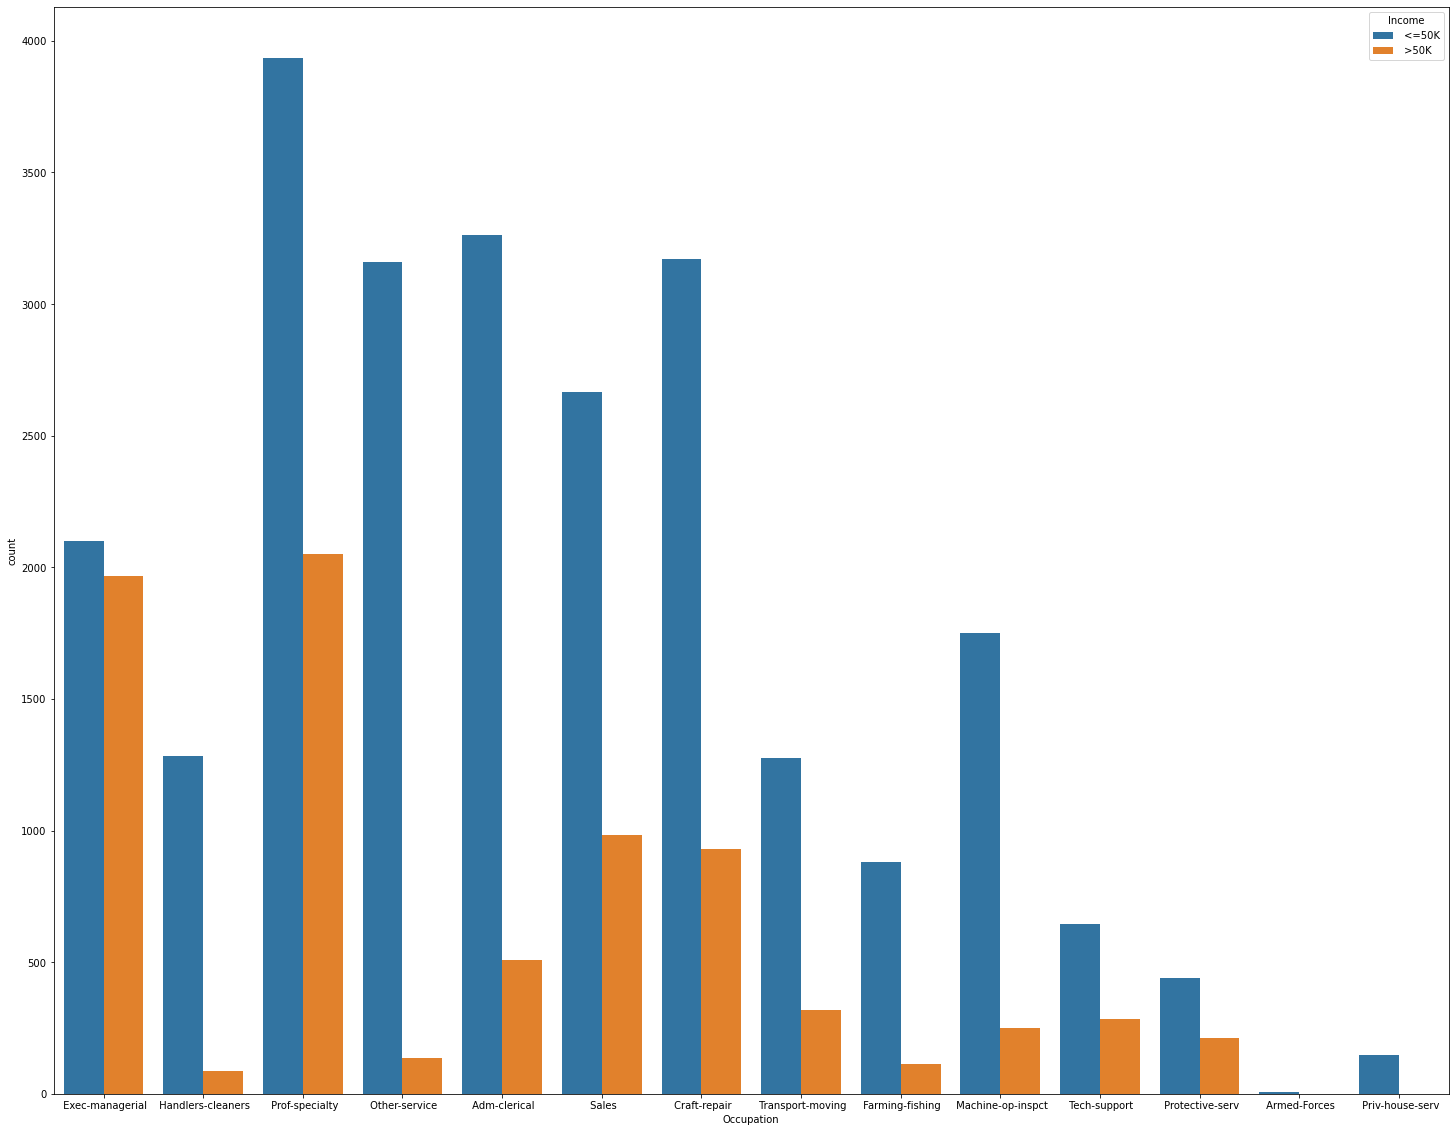

In [26]:
plt.figure(figsize=(25,20))
sns.countplot(x="Occupation",hue="Income",data=df)

# prof-speciality have the highest number of more than 50k income followed by exec-mangerial

<AxesSubplot:xlabel='Race', ylabel='count'>

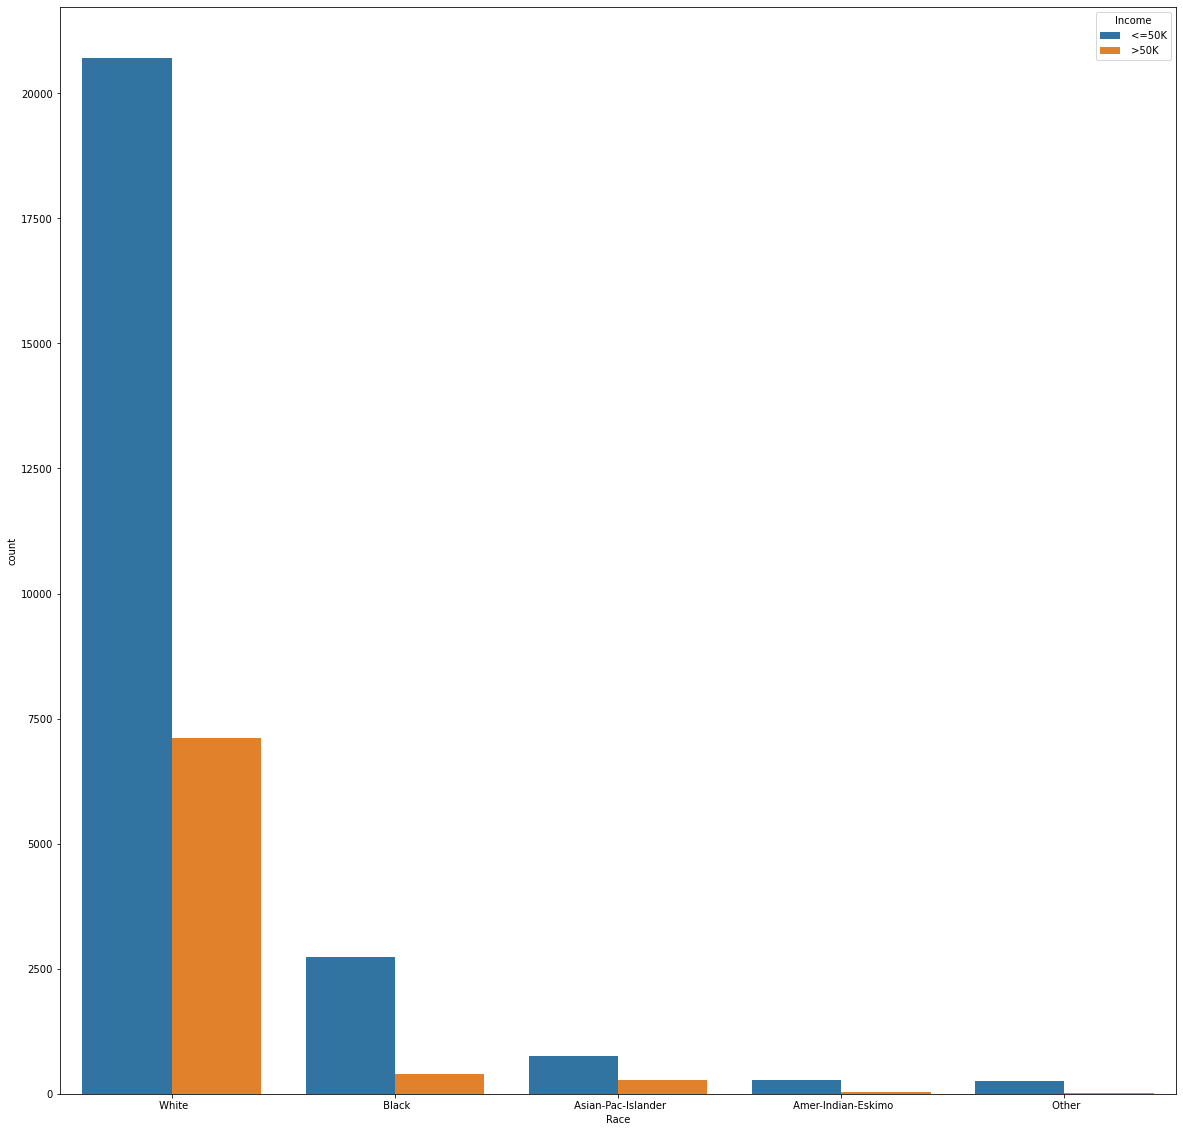

In [27]:
plt.figure(figsize=(20,20))
sns.countplot(x="Race",hue="Income",data=df)

# white people population is having number of more than 50k income

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

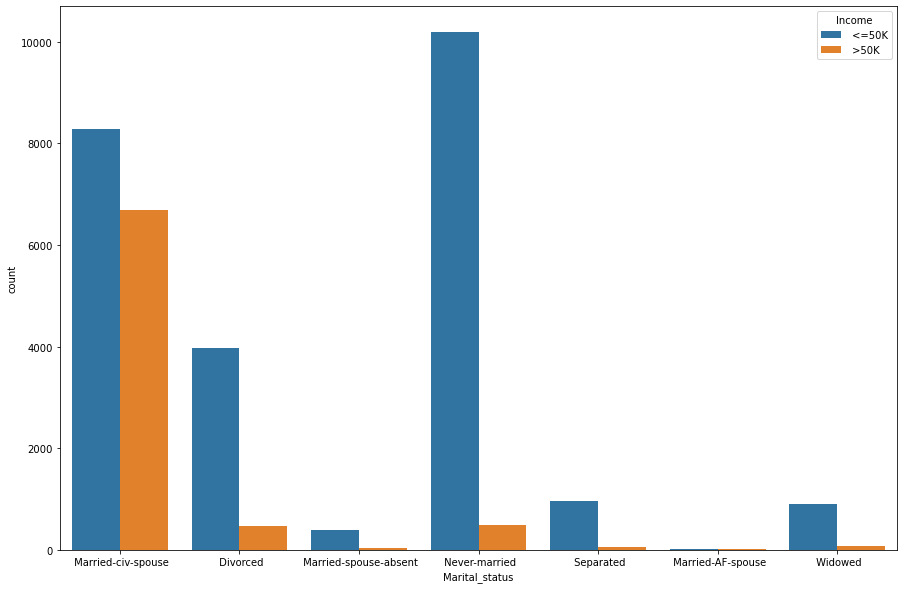

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x="Marital_status",hue="Income",data=df)

# people with spouse have highest number of more than 50k income

<AxesSubplot:xlabel='Education_num', ylabel='count'>

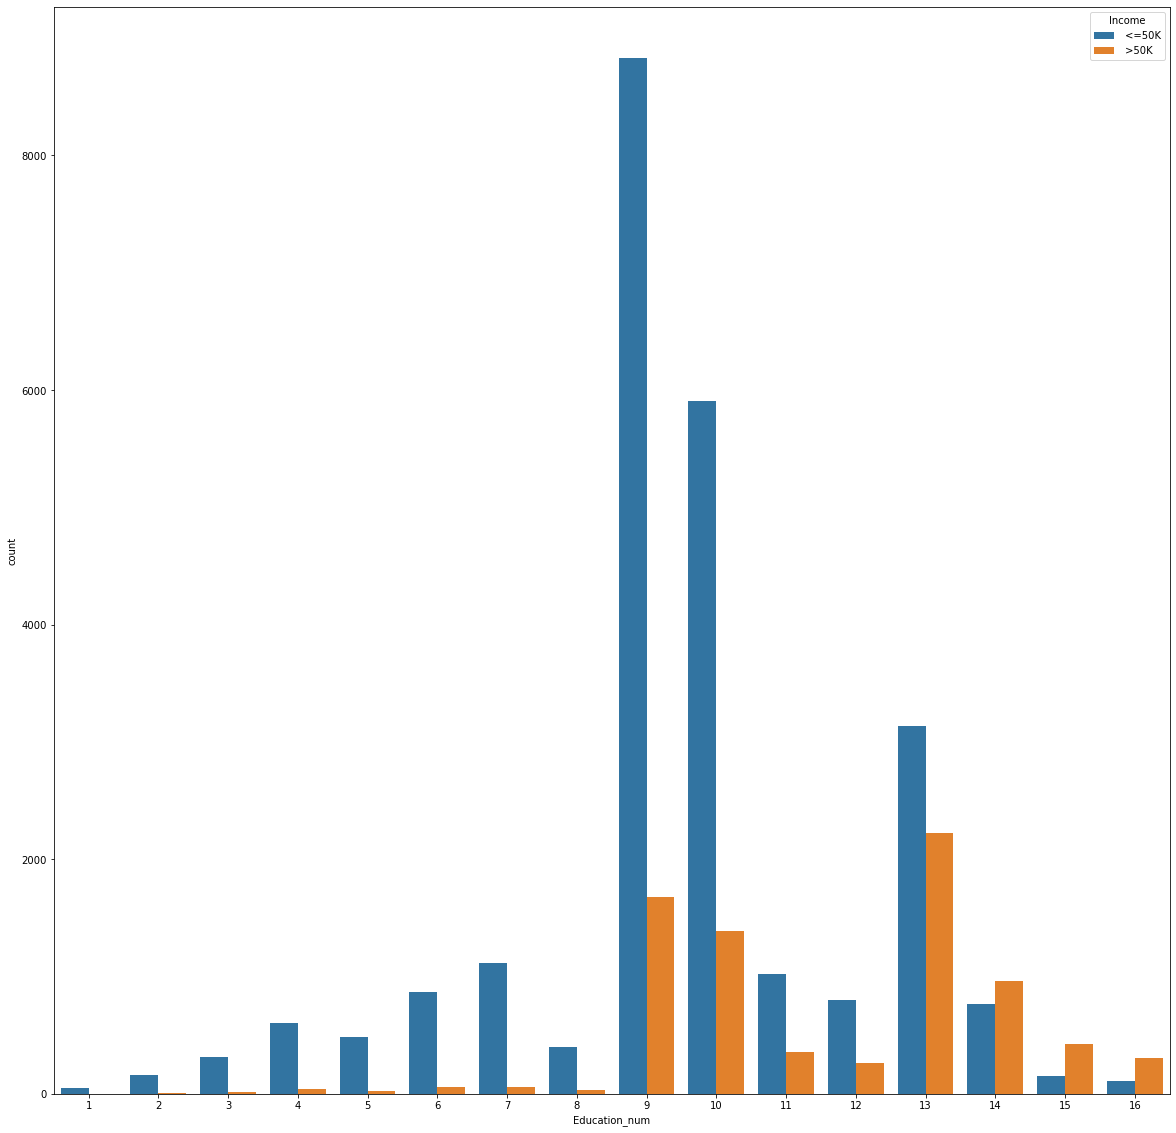

In [29]:
plt.figure(figsize=(20,20))
sns.countplot(x="Education_num",hue="Income",data=df)

# what we see is people with high education is having high salary

{'bodies': [<matplotlib.collections.PolyCollection at 0x2a735d6d310>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a7356e54f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a735d868b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a735d86bb0>}

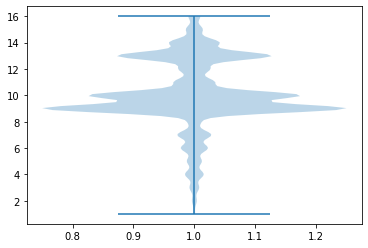

In [30]:
plt.violinplot(df["Education_num"])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

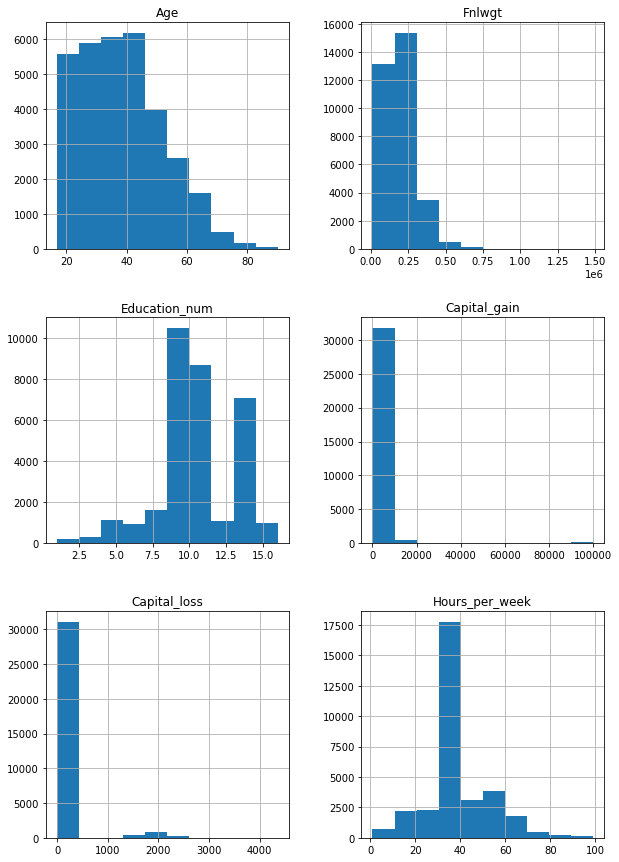

In [31]:
df.hist(figsize=(10,15))

In [32]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


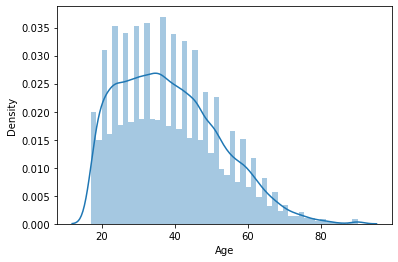

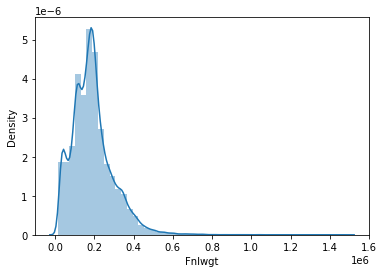

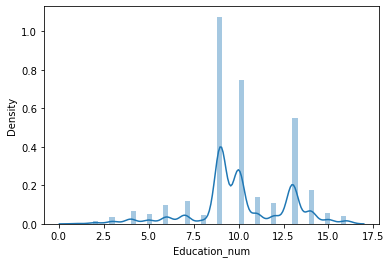

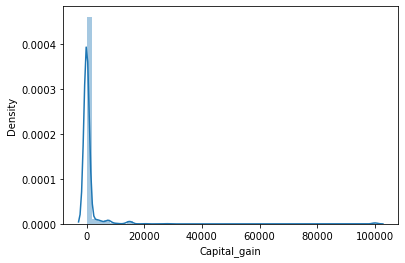

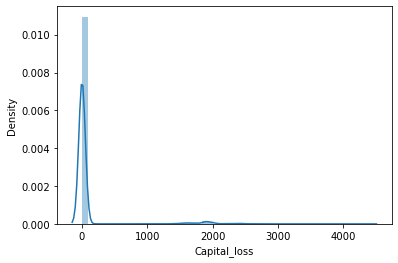

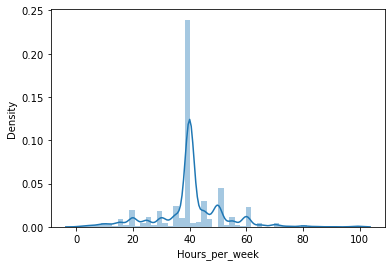

In [33]:
#checking for skewness in data
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

# we can see the skewness present in the data

Age                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Fnlwgt            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Education_num     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Capital_gain      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Capital_loss      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Hours_per_week    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
dtype: object

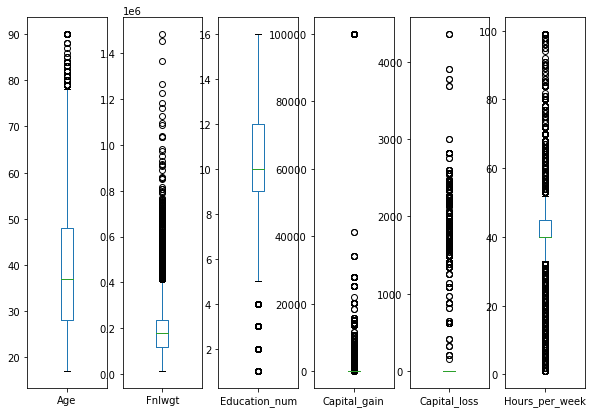

In [34]:
#checking outliers by using boxplot
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,15))

In [35]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [36]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [37]:
df.shape

(32560, 15)

# we can see that all the columns are showing outliers in the data

In [38]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Encoding the object type data to numerical data

In [39]:
#using label encoder on object type data
le= LabelEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=le.fit_transform(df[i])

In [40]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [41]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


# we converted the object type dat to numerical

# moving forward to statistical analysis

In [42]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


<AxesSubplot:>

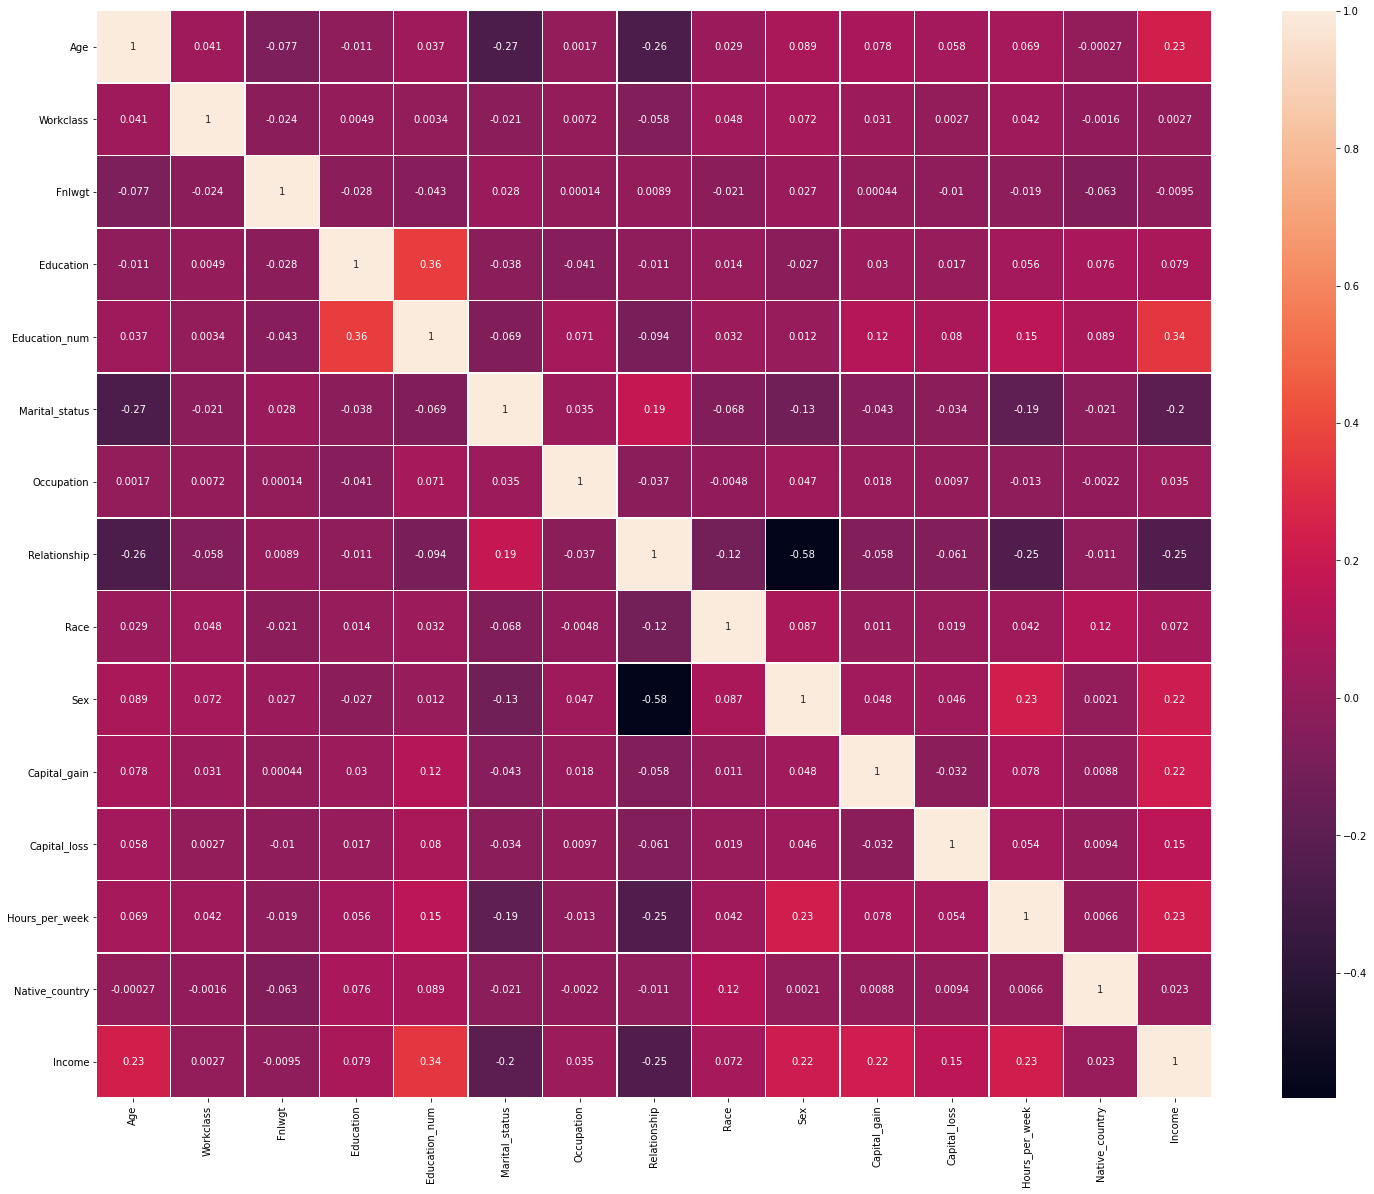

In [43]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# we decide to drop columns workclass,race,fnlwgt,native_country as they contains very less correlation with the income 

# droping the column education as it is very less correlated with the income and there is already column education_num present which shows high correlation with income

In [44]:
df=df.drop(['Workclass','Fnlwgt','Race','Native_country'],axis=1)
df

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,9,13,2,3,0,1,0,0,13,0
1,38,11,9,0,5,1,1,0,0,40,0
2,53,1,7,2,5,0,1,0,0,40,0
3,28,9,13,2,9,5,0,0,0,40,0
4,37,12,14,2,3,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,7,12,2,12,5,0,0,0,38,0
32556,40,11,9,2,6,0,1,0,0,40,1
32557,58,11,9,6,0,4,0,0,0,40,0
32558,22,11,9,4,0,3,1,0,0,20,0


In [45]:
df=df.drop(['Education'],axis=1)

In [46]:
df.corr()

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.036527,-0.266292,0.001740,-0.263698,0.088832,0.077674,0.057775,0.068756,0.234039
Education_num,0.036527,1.000000,-0.069338,0.071012,-0.094145,0.012256,0.122627,0.079932,0.148127,0.335182
Marital_status,-0.266292,-0.069338,1.000000,0.035008,0.185461,-0.129337,-0.043398,-0.034182,-0.190521,-0.199295
Occupation,0.001740,0.071012,0.035008,1.000000,-0.037465,0.047497,0.018028,0.009670,-0.012881,0.034599
Relationship,-0.263698,-0.094145,0.185461,-0.037465,1.000000,-0.582453,-0.057918,-0.061064,-0.248975,-0.250924
Sex,0.088832,0.012256,-0.129337,0.047497,-0.582453,1.000000,0.048477,0.045572,0.229312,0.215995
Capital_gain,0.077674,0.122627,-0.043398,0.018028,-0.057918,0.048477,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,0.079932,-0.034182,0.009670,-0.061064,0.045572,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,0.148127,-0.190521,-0.012881,-0.248975,0.229312,0.078409,0.054256,1.000000,0.229690
Income,0.234039,0.335182,-0.199295,0.034599,-0.250924,0.215995,0.223333,0.150523,0.229690,1.000000


# Removing outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [48]:
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([8, 7, 8, ..., 0, 8, 8], dtype=int64))


In [49]:
df1=df[(z<3).all(axis=1)]
df1

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,13,2,3,0,1,0,0,13,0
1,38,9,0,5,1,1,0,0,40,0
2,53,7,2,5,0,1,0,0,40,0
3,28,13,2,9,5,0,0,0,40,0
4,37,14,2,3,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32555,27,12,2,12,5,0,0,0,38,0
32556,40,9,2,6,0,1,0,0,40,1
32557,58,9,6,0,4,0,0,0,40,0
32558,22,9,4,0,3,1,0,0,20,0


In [50]:
df.shape

(32560, 10)

In [51]:
df1.shape

(30150, 10)

In [52]:
data_loss=(32560-30150)/32560*100
data_loss

7.401719901719901

# data loss is not more than 10% after removing the outliers 

we can move forward after removing outliers

# removing skewness

In [53]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [54]:
x

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,13,2,3,0,1,0,0,13
1,38,9,0,5,1,1,0,0,40
2,53,7,2,5,0,1,0,0,40
3,28,13,2,9,5,0,0,0,40
4,37,14,2,3,5,0,0,0,40
...,...,...,...,...,...,...,...,...,...
32555,27,12,2,12,5,0,0,0,38
32556,40,9,2,6,0,1,0,0,40
32557,58,9,6,0,4,0,0,0,40
32558,22,9,4,0,3,1,0,0,20


In [55]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [56]:
x.columns

Index(['Age', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
       'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week'],
      dtype='object')

In [57]:
x.skew()

Age                0.558738
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [58]:
#to remove skewness using power transform
from sklearn.preprocessing import power_transform
x[['Age', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
       'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]=power_transform(x[['Age', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
       'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week']],method='yeo-johnson')
x

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.891947,1.164793,-0.383427,-0.717443,-1.094635,0.703087,-0.301370,-0.221213,-2.221515
1,0.102717,-0.464330,-1.782434,-0.184920,0.134511,0.703087,-0.301370,-0.221213,-0.035570
2,1.064381,-1.200274,-0.383427,-0.184920,-1.094635,0.703087,-0.301370,-0.221213,-0.035570
3,-0.731663,1.164793,-0.383427,0.743395,1.549018,-1.422298,-0.301370,-0.221213,-0.035570
4,0.028023,1.600809,-0.383427,-0.717443,1.549018,-1.422298,-0.301370,-0.221213,-0.035570
...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.739697,-0.383427,1.366965,1.549018,-1.422298,-0.301370,-0.221213,-0.197550
32556,0.247374,-0.464330,-0.383427,0.060934,-1.094635,0.703087,-0.301370,-0.221213,-0.035570
32557,1.334556,-0.464330,2.171784,-1.721574,1.351388,-1.422298,-0.301370,-0.221213,-0.035570
32558,-1.358341,-0.464330,0.919719,-1.721574,1.091081,0.703087,-0.301370,-0.221213,-1.654992


# EDA,cleansing and visaulization  is done now we scale the data

# feature scaling

In [59]:
#using standard scaler to scale non categorical data
sc=StandardScaler()

x[['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]=sc.fit_transform(x[['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']])

# we have scaled the data

# PCA

In [60]:
for i in range(2,10):
    pc=PCA(n_components=i)
    principalcomponents=pc.fit_transform(x)
    print(i,sum(pc.explained_variance_ratio_))

2 0.3642378831659185
3 0.48606017882551666
4 0.6036550425552736
5 0.7088990915205077
6 0.804910474017979
7 0.8891571874831865
8 0.9629043768835054
9 0.9999999999999999


# NO NEED to use PCA 

# Model Buliding

In [61]:
#to find out the best random_state
lg=LogisticRegression()

for i in range(10,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(xtrain,ytrain)
    pred_train=lg.predict(xtrain)
    pred_test=lg.predict(xtest)
    if round(accuracy_score(ytrain,pred_train)*100,1)==round(accuracy_score(ytest,pred_test)*100,1):
        print('At random state :- ',i)
        print('training score is :',accuracy_score(ytrain,pred_train)*100)
        print('testing score is :',accuracy_score(ytest,pred_test)*100)
        print('\n')

At random state :-  39
training score is : 82.54376535626535
testing score is : 82.47850122850123


At random state :-  41
training score is : 82.54376535626535
testing score is : 82.47850122850123


At random state :-  50
training score is : 82.50153562653563
testing score is : 82.50921375921376


At random state :-  52
training score is : 82.5284090909091
testing score is : 82.53992628992629


At random state :-  60
training score is : 82.49385749385749
testing score is : 82.47850122850123


At random state :-  75
training score is : 82.47082309582309
testing score is : 82.50921375921376


At random state :-  78
training score is : 82.49385749385749
testing score is : 82.52457002457002


At random state :-  95
training score is : 82.52073095823096
testing score is : 82.52457002457002


At random state :-  96
training score is : 82.5284090909091
testing score is : 82.49385749385749


At random state :-  100
training score is : 82.54376535626535
testing score is : 82.47850122850123


A

In [62]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc]

In [168]:
#testing the models and checking their accuracy, cross_val_score as well as roc_auc-score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    score=cross_val_score(m,x,y,cv=5).mean()    
    print('cross_val score :',score)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('roc auc score :',roc_auc_score(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.832463144963145
cross_val score : 0.825
[[4633  326]
 [ 765  788]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4959
           1       0.71      0.51      0.59      1553

    accuracy                           0.83      6512
   macro avg       0.78      0.72      0.74      6512
weighted avg       0.82      0.83      0.82      6512

roc auc score : 0.7208329811213054


Accuracy score of  DecisionTreeClassifier() is :
0.8166461916461917
cross_val score : 0.8087530712530713
[[4372  587]
 [ 607  946]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4959
           1       0.62      0.61      0.61      1553

    accuracy                           0.82      6512
   macro avg       0.75      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512

roc auc score : 0.7453864769019677


Accuracy score of  KNeighb

# AFter testting all the models what we can conlude is that 

# ADABOOST AND gradientboosting classifier have the highest accuracy of close to 87%

# and random forest with close to 85%

# Hypertuning parameters of the best models

# ADABoostClassifier

In [170]:
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'learning_rate': 1, 'n_estimators': 200}


In [63]:
ada=AdaBoostClassifier(learning_rate=1,n_estimators=200)
ada.fit(x,y)
pred=ada.predict(x)
print('accuracy :',accuracy_score(y,pred))

accuracy : 0.8617628992628993


In [175]:
ada=AdaBoostClassifier(learning_rate=1,n_estimators=200)
ada.fit(xtrain,ytrain)
pred=ada.predict(xtest)
print('accuracy :',accuracy_score(ytest,pred))

accuracy : 0.8668611793611793


gradient boosting classifier

In [ ]:
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x,y)
print(gd.best_params_)

In [64]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
gbc.fit(x,y)
pred=gbc.predict(x)
print('accuracy :',accuracy_score(y,pred))

accuracy : 0.8666769041769041


In [65]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
gbc.fit(xtrain,ytrain)
pred=gbc.predict(xtest)
print('accuracy :',accuracy_score(ytest,pred))

accuracy : 0.8691646191646192


RANDOM FOREST CLASSIFIER

In [179]:
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'max_features': 'auto', 'n_estimators': 150}


In [82]:
rfc=RandomForestClassifier(max_features='auto',n_estimators=150)
rfc.fit(xtrain,ytrain)
pred=rfc.predict(xtest)
print('accuracy :',accuracy_score(ytest,pred))

accuracy : 0.8379914004914005


# testing on whole dataset

In [84]:
rfc=RandomForestClassifier(max_features='auto',n_estimators=150)
rfc.fit(x,y)
pred=rfc.predict(x)
print('accuracy :',accuracy_score(y,pred))

accuracy : 0.9562960687960688


# after hypertuning we found our best model as RandomForest classifier with best accuracy

# roc curve for the model shown

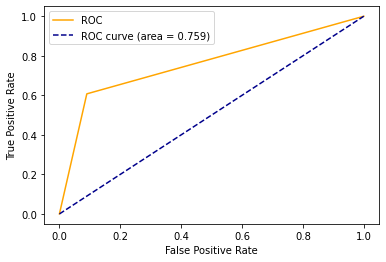

In [74]:
fpr, tpr, threshold = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [85]:
x['predicted']=rfc.predict(x)

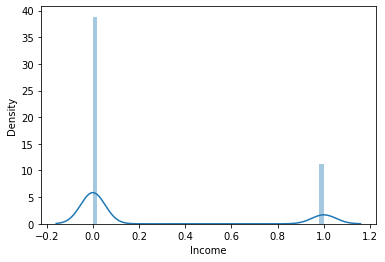

<AxesSubplot:xlabel='predicted', ylabel='Density'>

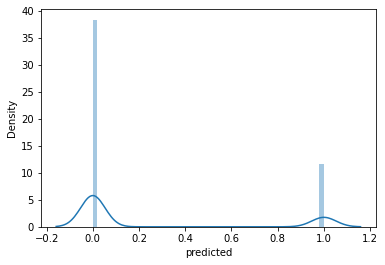

In [86]:
sns.distplot(df1['Income'])
plt.show()
sns.distplot(x['predicted'])

# the actual data and predicted are very similar to each other so we can save the random forest classifier

In [194]:
joblib.dump(rfc,'census.obj')

['census.obj']